# Requirements

In [1]:
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Add as many imports as you need.

## Blood Pressure Analysis


# Dataset Description

## Attributes

* id - patient identifier
* age - patient age
* height - patient height in cm
* weight - patient weight in kg
* blood sugar - patient blood sugar level
* Cholesterol - patient cholesterol level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - does patient have dental caries

### Target variable
* blood - patient systolic blood pressure

# Read the dataset

In [3]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('blood_pressure_data.csv')
data.head()

,id,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,NaN,NaN,180.0,65.0,70.0,NaN,149.0,NaN,NaN,87.0,13.9,1.0,NaN,19.0,NaN,NaN,No,112.0
1,57468.0,7/5/1979,150.0,50.0,88.0,92.0,219.0,LOW,NaN,137.0,13.2,NaN,0.6,26.0,17.0,NaN,No,138.0
2,55209.0,11/27/1954,175.0,75.0,NaN,NaN,217.0,NORMAL,50.0,142.0,NaN,1.0,0.8,22.0,22.0,NaN,No,137.0
3,3335.0,9/13/1984,160.0,NaN,NaN,100.0,160.0,HiGH,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,No,133.0
4,70782.0,8/15/1984,170.0,NaN,68.0,99.0,176.0,LOW,NaN,96.0,13.8,1.0,0.9,33.0,NaN,11.0,No,NaN


Explore the dataset using visualizations of your choice.

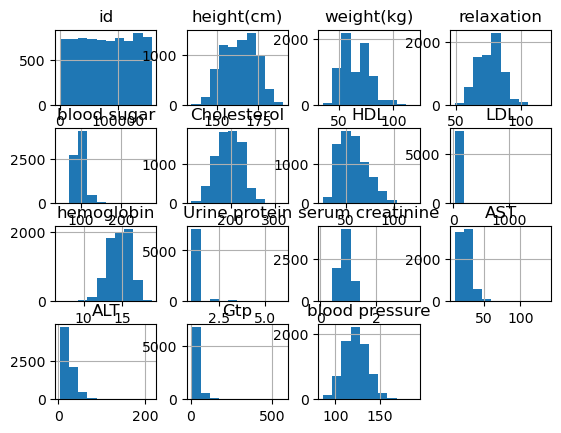

In [5]:
# Write your code here. Add as many boxes as you need.
data.hist()
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [7]:
# Write your code here. Add as many boxes as you need.
data.isnull().sum()

id                  2672
age                 2688
height(cm)          2627
weight(kg)          2556
relaxation          2575
blood sugar         2562
Cholesterol         2614
triglyceride        1356
HDL                 2609
LDL                 2642
hemoglobin          2583
Urine protein       2525
serum creatinine    2567
AST                 2573
ALT                 2584
Gtp                 2589
dental caries          0
blood pressure      2523
dtype: int64

In [9]:
data.isnull().sum() / len(data) * 100

id                  26.72
age                 26.88
height(cm)          26.27
weight(kg)          25.56
relaxation          25.75
blood sugar         25.62
Cholesterol         26.14
triglyceride        13.56
HDL                 26.09
LDL                 26.42
hemoglobin          25.83
Urine protein       25.25
serum creatinine    25.67
AST                 25.73
ALT                 25.84
Gtp                 25.89
dental caries        0.00
blood pressure      25.23
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

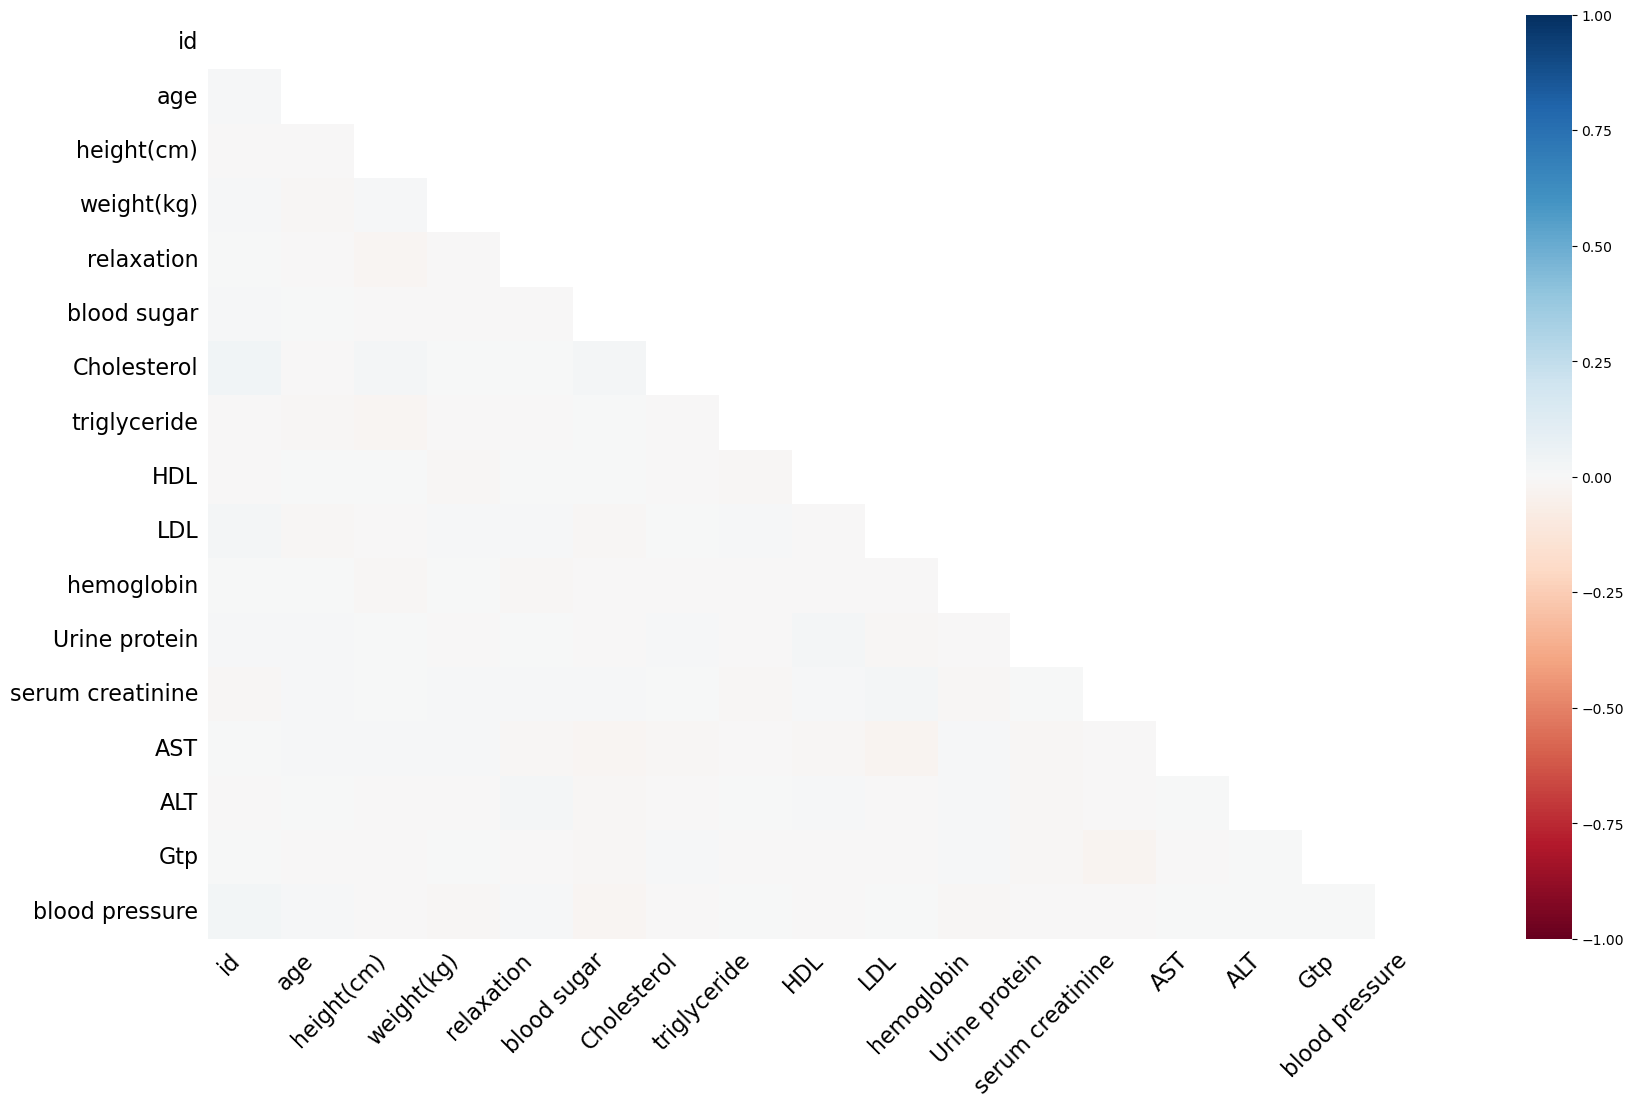

In [11]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(data)
plt.show()

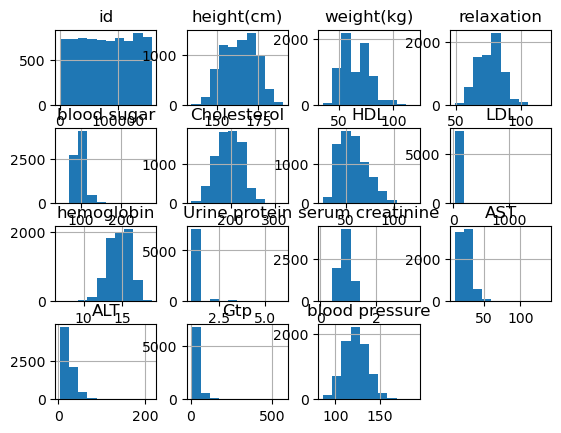

In [13]:
data.hist()
plt.show()

In [15]:
data.isnull().sum()

id                  2672
age                 2688
height(cm)          2627
weight(kg)          2556
relaxation          2575
blood sugar         2562
Cholesterol         2614
triglyceride        1356
HDL                 2609
LDL                 2642
hemoglobin          2583
Urine protein       2525
serum creatinine    2567
AST                 2573
ALT                 2584
Gtp                 2589
dental caries          0
blood pressure      2523
dtype: int64

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [17]:
# Write your code here. Add as many boxes as you need.
def impute(data,columns,strategy):
    imp = SimpleImputer(strategy=strategy)
    data_copy = data.copy()
    for c in columns:
        data_copy[c] = imp.fit_transform(data_copy[[c]]).ravel()
    return data_copy

In [19]:
def drop_data(data,columns):
    data_copy = data.copy()
    data_copy.drop(columns,axis=1,inplace=True)
    return data_copy

In [21]:
data = drop_data(data=data,columns=['id','age'])

In [23]:
data.head()

,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,180.0,65.0,70.0,NaN,149.0,NaN,NaN,87.0,13.9,1.0,NaN,19.0,NaN,NaN,No,112.0
1,150.0,50.0,88.0,92.0,219.0,LOW,NaN,137.0,13.2,NaN,0.6,26.0,17.0,NaN,No,138.0
2,175.0,75.0,NaN,NaN,217.0,NORMAL,50.0,142.0,NaN,1.0,0.8,22.0,22.0,NaN,No,137.0
3,160.0,NaN,NaN,100.0,160.0,HiGH,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,No,133.0
4,170.0,NaN,68.0,99.0,176.0,LOW,NaN,96.0,13.8,1.0,0.9,33.0,NaN,11.0,No,NaN


In [25]:
data['height(cm)'].skew()

-0.06228552806876035

In [27]:
data['weight(kg)'].skew()

0.47264438323643454

In [29]:
data['relaxation'].skew()

0.16534348594317055

In [31]:
data['blood sugar'].skew()

3.383119833322478

In [33]:
data['Cholesterol'].skew()

0.06996129921984517

In [35]:
data['HDL'].skew()

0.646928327530015

In [37]:
data['LDL'].skew()

15.946589651994655

In [39]:
data['hemoglobin'].skew()

-0.5016788381957651

In [41]:
data['Urine protein'].skew()

5.65197146346618

In [43]:
data['serum creatinine'].skew()

0.6875041108056494

In [45]:
data['AST'].skew()

2.283305319696595

In [47]:
data['ALT'].skew()

2.8491787981647074

In [49]:
data['Gtp'].skew()

5.058540776085521

In [51]:
data = impute(data=data,columns=['height(cm)','weight(kg)','relaxation','Cholesterol','hemoglobin'],strategy='mean')

In [53]:
data.isnull().sum()

height(cm)             0
weight(kg)             0
relaxation             0
blood sugar         2562
Cholesterol            0
triglyceride        1356
HDL                 2609
LDL                 2642
hemoglobin             0
Urine protein       2525
serum creatinine    2567
AST                 2573
ALT                 2584
Gtp                 2589
dental caries          0
blood pressure      2523
dtype: int64

In [55]:
data = impute(data=data,columns=['blood sugar','HDL','LDL','Urine protein','serum creatinine','AST','ALT','Gtp'],strategy='median')

In [57]:
data.isnull().sum()

height(cm)             0
weight(kg)             0
relaxation             0
blood sugar            0
Cholesterol            0
triglyceride        1356
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
blood pressure      2523
dtype: int64

In [59]:
data.dropna(subset=['blood pressure'],inplace=True)

In [61]:
data.isnull().sum()

height(cm)             0
weight(kg)             0
relaxation             0
blood sugar            0
Cholesterol            0
triglyceride        1007
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
blood pressure         0
dtype: int64

In [71]:
#imp = SimpleImputer(strategy='most_frequent')
#data['triglyceride'] = imp.fit_transform(data[['triglyceride']]).ravel()
data = impute(data=data,columns=['triglyceride'],strategy='most_frequent')


In [73]:
data.isnull().sum()

height(cm)          0
weight(kg)          0
relaxation          0
blood sugar         0
Cholesterol         0
triglyceride        0
HDL                 0
LDL                 0
hemoglobin          0
Urine protein       0
serum creatinine    0
AST                 0
ALT                 0
Gtp                 0
dental caries       0
blood pressure      0
dtype: int64

In [75]:
data.isnull().sum()

height(cm)          0
weight(kg)          0
relaxation          0
blood sugar         0
Cholesterol         0
triglyceride        0
HDL                 0
LDL                 0
hemoglobin          0
Urine protein       0
serum creatinine    0
AST                 0
ALT                 0
Gtp                 0
dental caries       0
blood pressure      0
dtype: int64

In [77]:
data.sample(20)

,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
1932,163.680998,65.355991,70.000000,95.0,200.000000,NORMAL,53.0,123.0,13.900000,1.0,0.6,23.0,17.0,25.0,No,110.0
3072,163.680998,65.000000,71.000000,110.0,223.000000,UNK,55.0,115.0,14.100000,1.0,1.1,23.0,34.0,55.0,No,125.0
8568,163.680998,60.000000,110.000000,110.0,192.000000,HiGH,58.0,97.0,12.200000,1.0,0.8,12.0,13.0,9.0,Yes,170.0
3460,175.000000,65.355991,78.000000,89.0,202.000000,LOW,46.0,140.0,16.600000,2.0,0.9,19.0,23.0,24.0,No,120.0
5741,163.680998,65.355991,75.000000,96.0,238.000000,LOW,75.0,144.0,13.700000,1.0,0.7,17.0,12.0,32.0,No,113.0
6625,160.000000,65.355991,76.469091,80.0,196.217845,LOW,46.0,115.0,14.600000,1.0,1.1,25.0,17.0,26.0,No,124.0
3685,163.680998,70.000000,70.000000,95.0,152.000000,LOW,55.0,115.0,14.800000,1.0,0.8,20.0,21.0,17.0,No,114.0
3832,155.000000,60.000000,76.469091,114.0,196.217845,LOW,86.0,115.0,14.300000,1.0,0.9,21.0,14.0,25.0,No,131.0
3357,163.680998,50.000000,75.000000,76.0,196.217845,LOW,55.0,100.0,10.100000,1.0,0.7,16.0,10.0,14.0,No,123.0
8070,165.000000,65.000000,70.000000,95.0,247.000000,LOW,71.0,161.0,13.200000,1.0,0.9,32.0,32.0,25.0,No,106.0


In [100]:
data.head()

,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,180.0,65.000000,70.000000,95.0,149.000000,LOW,55.0,87.0,13.900000,1.0,0.9,19.0,21.0,25.0,No,112.0
1,150.0,50.000000,88.000000,92.0,219.000000,LOW,55.0,137.0,13.200000,1.0,0.6,26.0,17.0,25.0,No,138.0
2,175.0,75.000000,76.469091,95.0,217.000000,NORMAL,50.0,142.0,14.567723,1.0,0.8,22.0,22.0,25.0,No,137.0
3,160.0,65.355991,76.469091,100.0,160.000000,HiGH,48.0,84.0,12.100000,1.0,0.6,15.0,19.0,14.0,No,133.0
6,155.0,50.000000,74.000000,95.0,196.217845,LOW,59.0,115.0,13.500000,1.0,0.7,44.0,28.0,17.0,No,138.0


## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [79]:
# Write your code here. Add as many boxes as you need.
enc = LabelEncoder()
data['triglyceride'] = enc.fit_transform(data['triglyceride'])

In [81]:
data.head()

,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,180.0,65.000000,70.000000,95.0,149.000000,2,55.0,87.0,13.900000,1.0,0.9,19.0,21.0,25.0,No,112.0
1,150.0,50.000000,88.000000,92.0,219.000000,2,55.0,137.0,13.200000,1.0,0.6,26.0,17.0,25.0,No,138.0
2,175.0,75.000000,76.469091,95.0,217.000000,3,50.0,142.0,14.567723,1.0,0.8,22.0,22.0,25.0,No,137.0
3,160.0,65.355991,76.469091,100.0,160.000000,1,48.0,84.0,12.100000,1.0,0.6,15.0,19.0,14.0,No,133.0
6,155.0,50.000000,74.000000,95.0,196.217845,2,59.0,115.0,13.500000,1.0,0.7,44.0,28.0,17.0,No,138.0


In [83]:
data['dental caries'] = enc.fit_transform(data['dental caries'])

In [85]:
data.head()

,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,180.0,65.000000,70.000000,95.0,149.000000,2,55.0,87.0,13.900000,1.0,0.9,19.0,21.0,25.0,0,112.0
1,150.0,50.000000,88.000000,92.0,219.000000,2,55.0,137.0,13.200000,1.0,0.6,26.0,17.0,25.0,0,138.0
2,175.0,75.000000,76.469091,95.0,217.000000,3,50.0,142.0,14.567723,1.0,0.8,22.0,22.0,25.0,0,137.0
3,160.0,65.355991,76.469091,100.0,160.000000,1,48.0,84.0,12.100000,1.0,0.6,15.0,19.0,14.0,0,133.0
6,155.0,50.000000,74.000000,95.0,196.217845,2,59.0,115.0,13.500000,1.0,0.7,44.0,28.0,17.0,0,138.0


## Model comparison with cross-validation

Train two models: XGBoost and RandomForest for predicting the target variable. Use 5-fold cross-validation to evaluate the performance of the models and compare them using adrquate metrics.

In [87]:
input = data.copy()
input.drop(columns=['blood pressure'],axis=1,inplace=True)
input.head()

,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,180.0,65.000000,70.000000,95.0,149.000000,2,55.0,87.0,13.900000,1.0,0.9,19.0,21.0,25.0,0
1,150.0,50.000000,88.000000,92.0,219.000000,2,55.0,137.0,13.200000,1.0,0.6,26.0,17.0,25.0,0
2,175.0,75.000000,76.469091,95.0,217.000000,3,50.0,142.0,14.567723,1.0,0.8,22.0,22.0,25.0,0
3,160.0,65.355991,76.469091,100.0,160.000000,1,48.0,84.0,12.100000,1.0,0.6,15.0,19.0,14.0,0
6,155.0,50.000000,74.000000,95.0,196.217845,2,59.0,115.0,13.500000,1.0,0.7,44.0,28.0,17.0,0


In [89]:
target = data.copy()['blood pressure']
target.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7477 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   height(cm)        7477 non-null   float64
 1   weight(kg)        7477 non-null   float64
 2   relaxation        7477 non-null   float64
 3   blood sugar       7477 non-null   float64
 4   Cholesterol       7477 non-null   float64
 5   triglyceride      7477 non-null   int32  
 6   HDL               7477 non-null   float64
 7   LDL               7477 non-null   float64
 8   hemoglobin        7477 non-null   float64
 9   Urine protein     7477 non-null   float64
 10  serum creatinine  7477 non-null   float64
 11  AST               7477 non-null   float64
 12  ALT               7477 non-null   float64
 13  Gtp               7477 non-null   float64
 14  dental caries     7477 non-null   int32  
 15  blood pressure    7477 non-null   float64
dtypes: float64(14), int32(2)
memory usage: 934.6 KB

In [93]:
# Write your code here. Add as many boxes as you need.
X_train, X_test, Y_train, Y_test = train_test_split(input, target, test_size=0.2)
model = XGBRegressor(n_estimators=100,max_depth=5,learning_rate=0.1)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print(r2_score(Y_test,y_pred))
print("Тренинг точност:", model.score(X_train, Y_train))
print("Тест точност:", model.score(X_test, Y_test))

0.4528950538746509
Тренинг точност: 0.5896074190300244
Тест точност: 0.4528950538746509


In [95]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100,max_depth=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)
print(r2_score(Y_test,y_pred2))
print("Тренинг точност:", model2.score(X_train, Y_train))
print("Тест точност:", model2.score(X_test, Y_test))

0.4496868254854759
Тренинг точност: 0.4709313367936797
Тест точност: 0.4496868254854759


# Cross-Validation

In [101]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import cross_val_score, LeaveOneOut
cv = cross_val_score(model,input,target,cv=5,scoring='r2')
print(cv.mean())
cv2 = cross_val_score(model2,input,target,cv=5,scoring='r2')
print(cv2.mean())

0.446690595909494
0.44262529863083433


Assess the performance of the models by using different metrics provided by the `scikit-learn` library.

In [54]:
# Write your code here. Add as many boxes as you need.